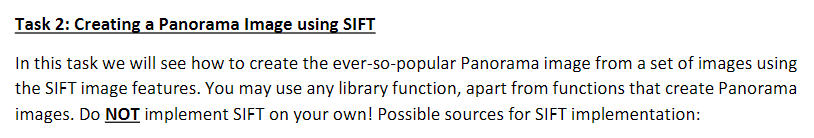

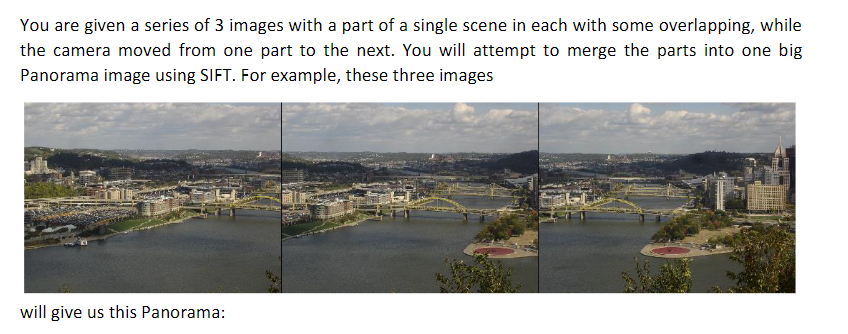

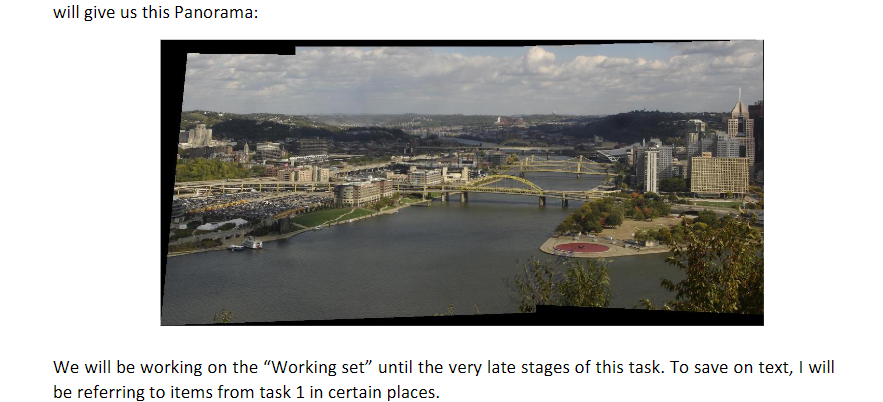

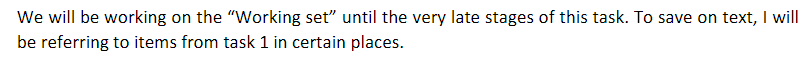

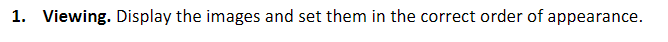

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.signal as sig
from scipy import misc
from scipy import ndimage
import imageio
from PIL import Image


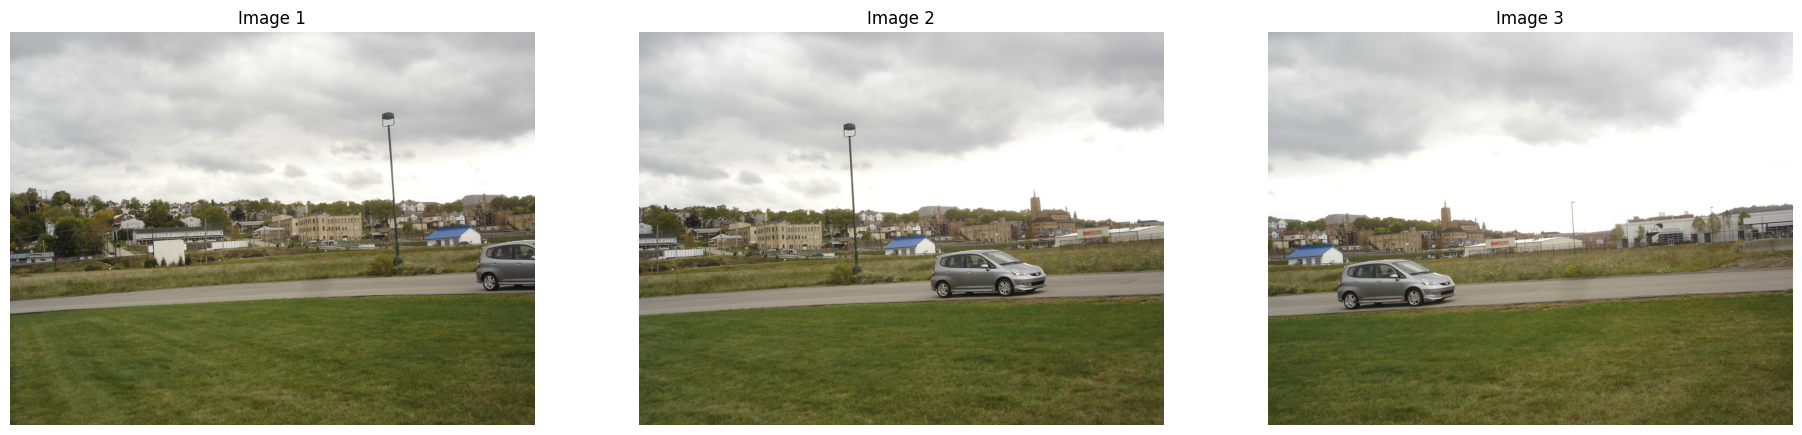

In [24]:
# Load images
img1 = cv2.imread('Q2/Working set/I1.jpg')
img2 = cv2.imread('Q2/Working set/I2.jpg')
img3 = cv2.imread('Q2/Working set/I3.jpg')

# Convert to RGB for displaying with matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(23,17))
plt.subplot(131), plt.imshow(img1_rgb), plt.title('Image 1')
plt.axis('off')
plt.subplot(132), plt.imshow(img2_rgb), plt.title('Image 2')
plt.axis('off')
plt.subplot(133), plt.imshow(img3_rgb), plt.title('Image 3')
plt.axis('off')
plt.show()

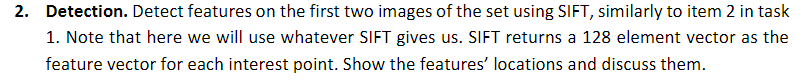

(-0.5, 999.5, 749.5, -0.5)

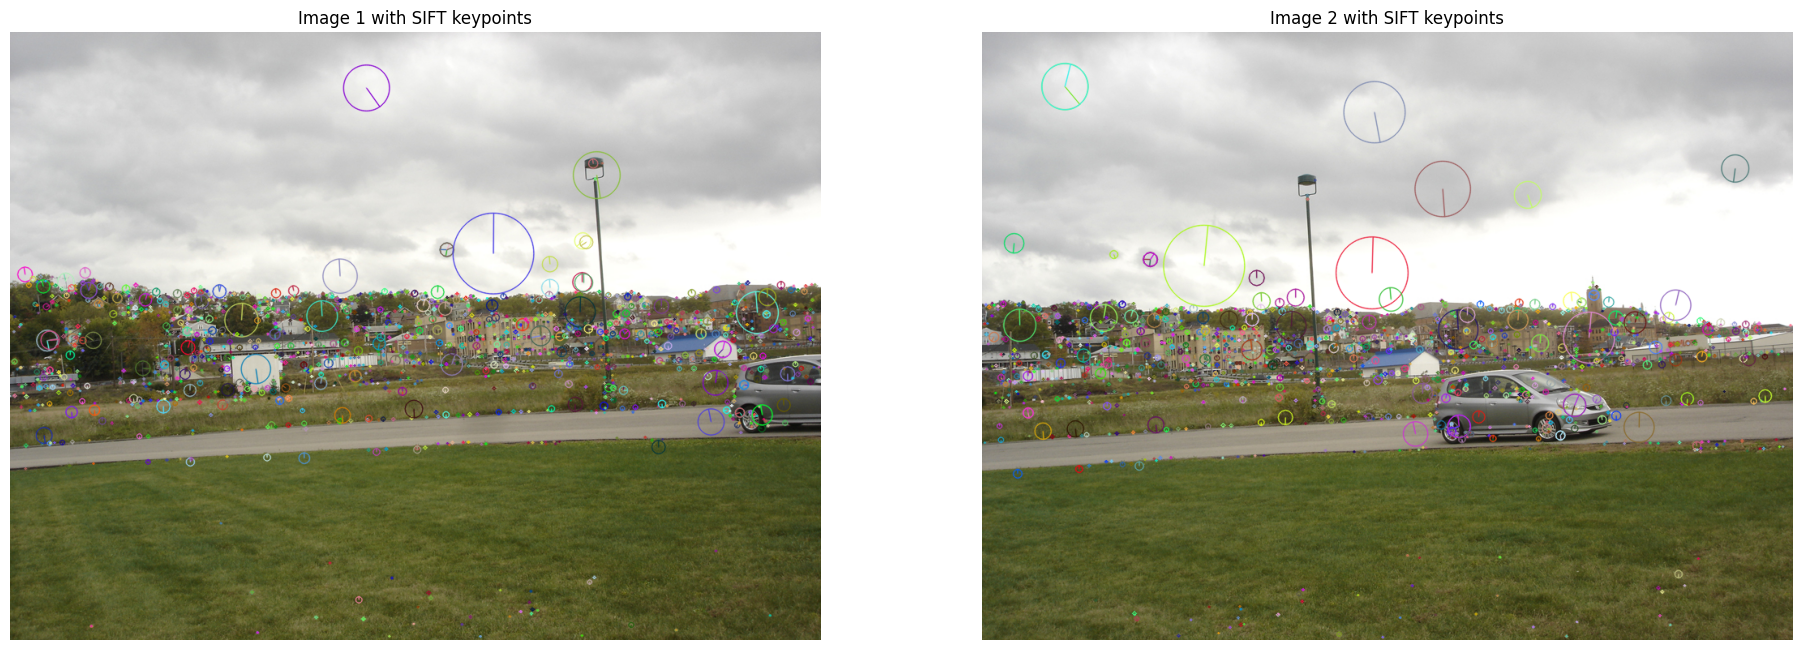

In [25]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)


# Draw keypoints on the images
img1_keypoints = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_keypoints = cv2.drawKeypoints(img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# Convert to RGB for displaying with matplotlib
img1_keypoints_rgb = cv2.cvtColor(img1_keypoints, cv2.COLOR_BGR2RGB)
img2_keypoints_rgb = cv2.cvtColor(img2_keypoints, cv2.COLOR_BGR2RGB)


# Display images with keypoints
fig, axes = plt.subplots(1, 2, figsize=(23, 17))
axes[0].imshow(img1_keypoints_rgb, cmap='gray')
axes[0].set_title('Image 1 with SIFT keypoints')
axes[0].axis('off')

axes[1].imshow(img2_keypoints_rgb, cmap='gray')
axes[1].set_title('Image 2 with SIFT keypoints')
axes[1].axis('off')



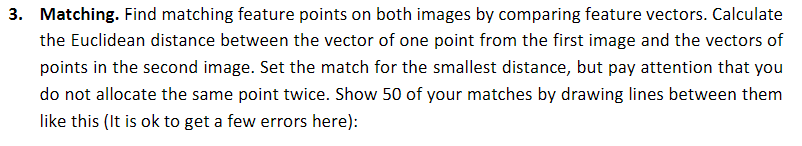

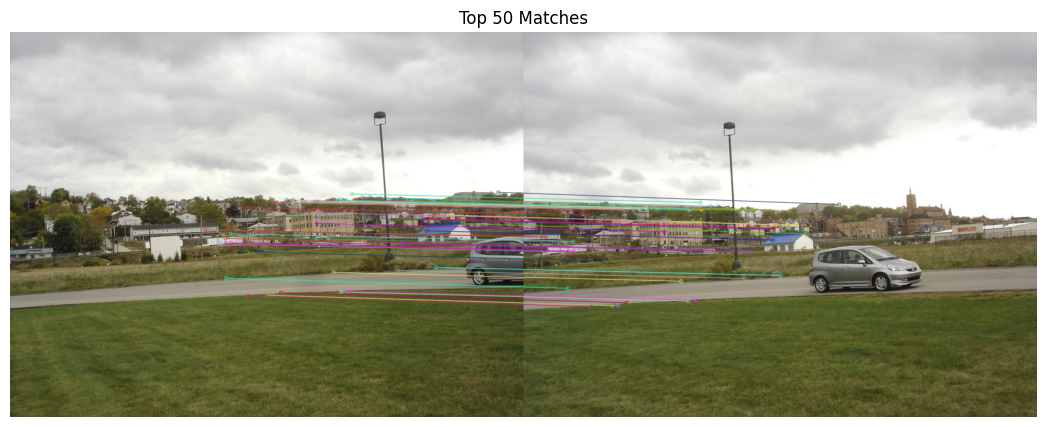

In [26]:
# Initialize BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches1_2 = bf.match(descriptors1, descriptors2)


# Sort matches by distance
matches1_2 = sorted(matches1_2, key=lambda x: x.distance)


# Draw top 50 matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches1_2[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert to RGB for displaying with matplotlib
img_matches_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

# Display matches
plt.figure(figsize=(15,5))
plt.imshow(img_matches_rgb), plt.title('Top 50 Matches')
plt.axis('off')
plt.show()


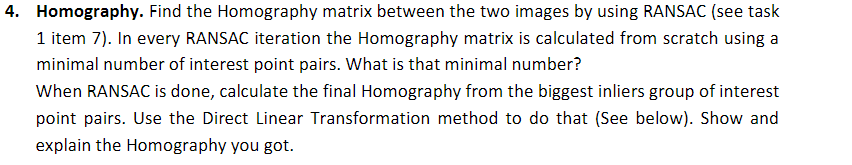

In RANSAC (Random Sample Consensus), the minimal number of interest point pairs required to compute the Homography matrix is 4. This is because the Homography matrix 
𝐻
H is a 3x3 matrix with 8 degrees of freedom (since it's defined up to scale). To uniquely determine 
𝐻
H, you need at least 4 corresponding points in both images

Step 1: Compute SIFT keypoints and descriptors
First, you'll compute SIFT keypoints and descriptors for both images (img1 and img2)

In [27]:
# Extract location of good matches
points1 = np.zeros((len(matches1_2), 2), dtype=np.float32)
points2 = np.zeros((len(matches1_2), 2), dtype=np.float32)

for i, match in enumerate(matches1_2):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt




# Find homography matrix using RANSAC
homography, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Print homography matrix
print("Homography Matrix:(Image 1 to Image 2)\n", homography)



Homography Matrix:(Image 1 to Image 2)
 [[ 1.19860462e+00 -1.78463799e-02 -4.02386775e+02]
 [ 9.18980410e-02  1.12763043e+00 -4.05352700e+01]
 [ 2.04450200e-04 -1.18545491e-05  1.00000000e+00]]


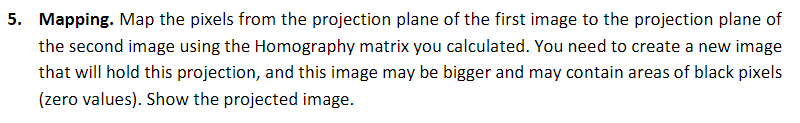

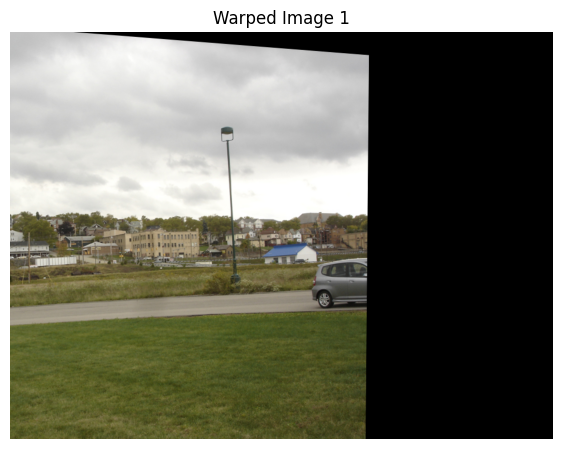

In [28]:
# Warp the first image to the second image's plane
height, width, channels = img2.shape
img1_warped = cv2.warpPerspective(img1, homography, (width, height))



# Display the warped image
img1_warped_rgb = cv2.cvtColor(img1_warped, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,13))
plt.imshow(img1_warped_rgb), plt.title('Warped Image 1')
plt.axis('off')
plt.show()


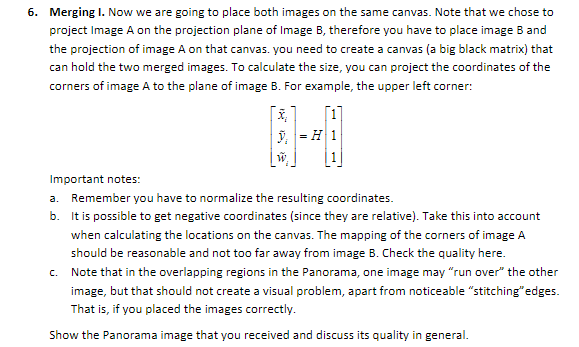

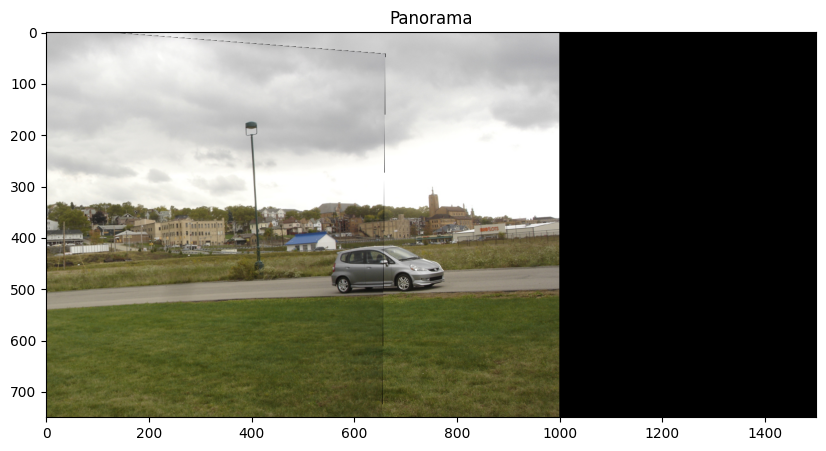

In [29]:
# Create a black canvas that can fit all three images
import itertools
canvas_width = img2.shape[1] + img1_warped.shape[1]//2
canvas_height = img2.shape[0]
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Place the second image on the canvas
canvas[:img2.shape[0], :img2.shape[1]] = img2



# Place the warped first image on the canvas
for i, j in itertools.product(range(img1_warped.shape[0]), range(img1_warped.shape[1])):
    if img1_warped[i, j].any():
        canvas[i, j] = img1_warped[i, j]

# Convert to RGB for displaying with matplotlib
canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Display the panorama
plt.figure(figsize=(15,5))
plt.imshow(canvas_rgb), plt.title('Panorama')
plt.show()


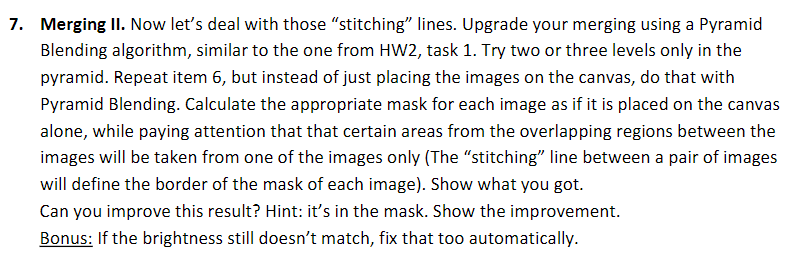

/tmp/ipykernel_547932/3337671794.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source = imageio.imread('Q2/Working set/I1.jpg')
/tmp/ipykernel_547932/3337671794.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  destination = imageio.imread('Q2/Working set/I2.jpg')


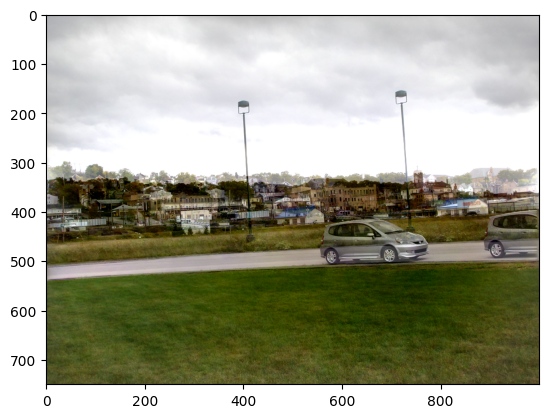

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio


def PoissonImageBlending(source, destination):
  # create an all "White" mask: 255, if black mask is 0
  mask = 255 * np.ones(destination.shape, destination.dtype) 
  # navigate the source img location
  width, height, channels = source.shape
  center = (height//2, width//2)

  blended = cv2.seamlessClone(destination, source, mask, center, 2) 
  plt.imshow(blended)

# run it!!
source = imageio.imread('Q2/Working set/I1.jpg')
destination = imageio.imread('Q2/Working set/I2.jpg')
PoissonImageBlending(destination,source)

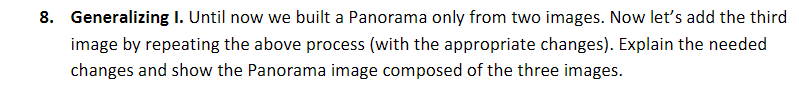

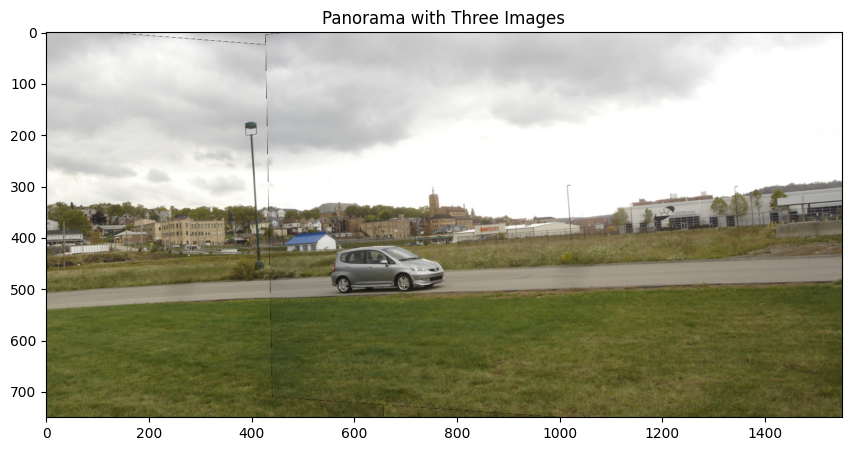

In [54]:
# Load images
img1 = cv2.imread('Q2/Working set/I1.jpg')
img2 = cv2.imread('Q2/Working set/I2.jpg')
img3 = cv2.imread('Q2/Working set/I3.jpg')

# Resize images to the same size
height, width = img1.shape[:2]
img2 = cv2.resize(img2, (width, height))
img3 = cv2.resize(img3, (width, height))

# SIFT detector
sift = cv2.SIFT_create()
bf = cv2.BFMatcher()

def get_homography_and_warp(img1, img2):
    # Detect features and match between img1 and img2
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract location of good matches
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Find Homography
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp img1 to the plane of img2
    warped_img = cv2.warpPerspective(img1, H, (img2.shape[1] + img1.shape[1], img2.shape[0]))
    
    return warped_img, H

# Warp img1 to img2
img1_warped, H_12 = get_homography_and_warp(img1, img2)

# Create a canvas for the first panorama
canvas1 = np.zeros((height, width*2, 3), dtype=np.uint8)
canvas1[:height, :width] = img2

# Place the warped img1 onto the canvas
for i, j in itertools.product(range(img1_warped.shape[0]), range(img1_warped.shape[1])):
    if img1_warped[i, j].any():
        canvas1[i, j] = img1_warped[i, j]

# Now warp img3 to the result of img1 and img2
img2_combined = canvas1[:, :width*2]

img2_warped, H_23 = get_homography_and_warp(img3, img2_combined)

# Create a final canvas for the full panorama
final_canvas_width = img2_combined.shape[1] + img3.shape[1]
final_canvas_height = img2_combined.shape[0]
final_canvas = np.zeros((final_canvas_height, final_canvas_width, 3), dtype=np.uint8)

# Place the result of img1 and img2 onto the final canvas
final_canvas[:height, :width*2] = img2_combined

# Place the warped img3 onto the final canvas
for i, j in itertools.product(range(img2_warped.shape[0]), range(img2_warped.shape[1])):
    if img2_warped[i, j].any():
        final_canvas[i, j] = img2_warped[i, j]

# Convert to RGB for displaying with matplotlib
final_canvas_rgb = cv2.cvtColor(final_canvas, cv2.COLOR_BGR2RGB)

# Display the final panorama
plt.figure(figsize=(15, 5))
plt.imshow(final_canvas_rgb[:,:1550,:])
plt.title('Panorama with Three Images')
plt.show()

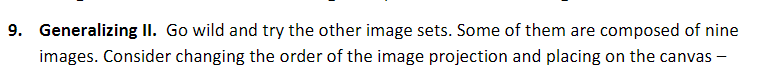